# Using GDA to create a deicsion boundary then using this to check accuracy on test data

In [3]:
import sklearn as sk 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn.model_selection as train_test_split

housing_data = pd.read_csv('./housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


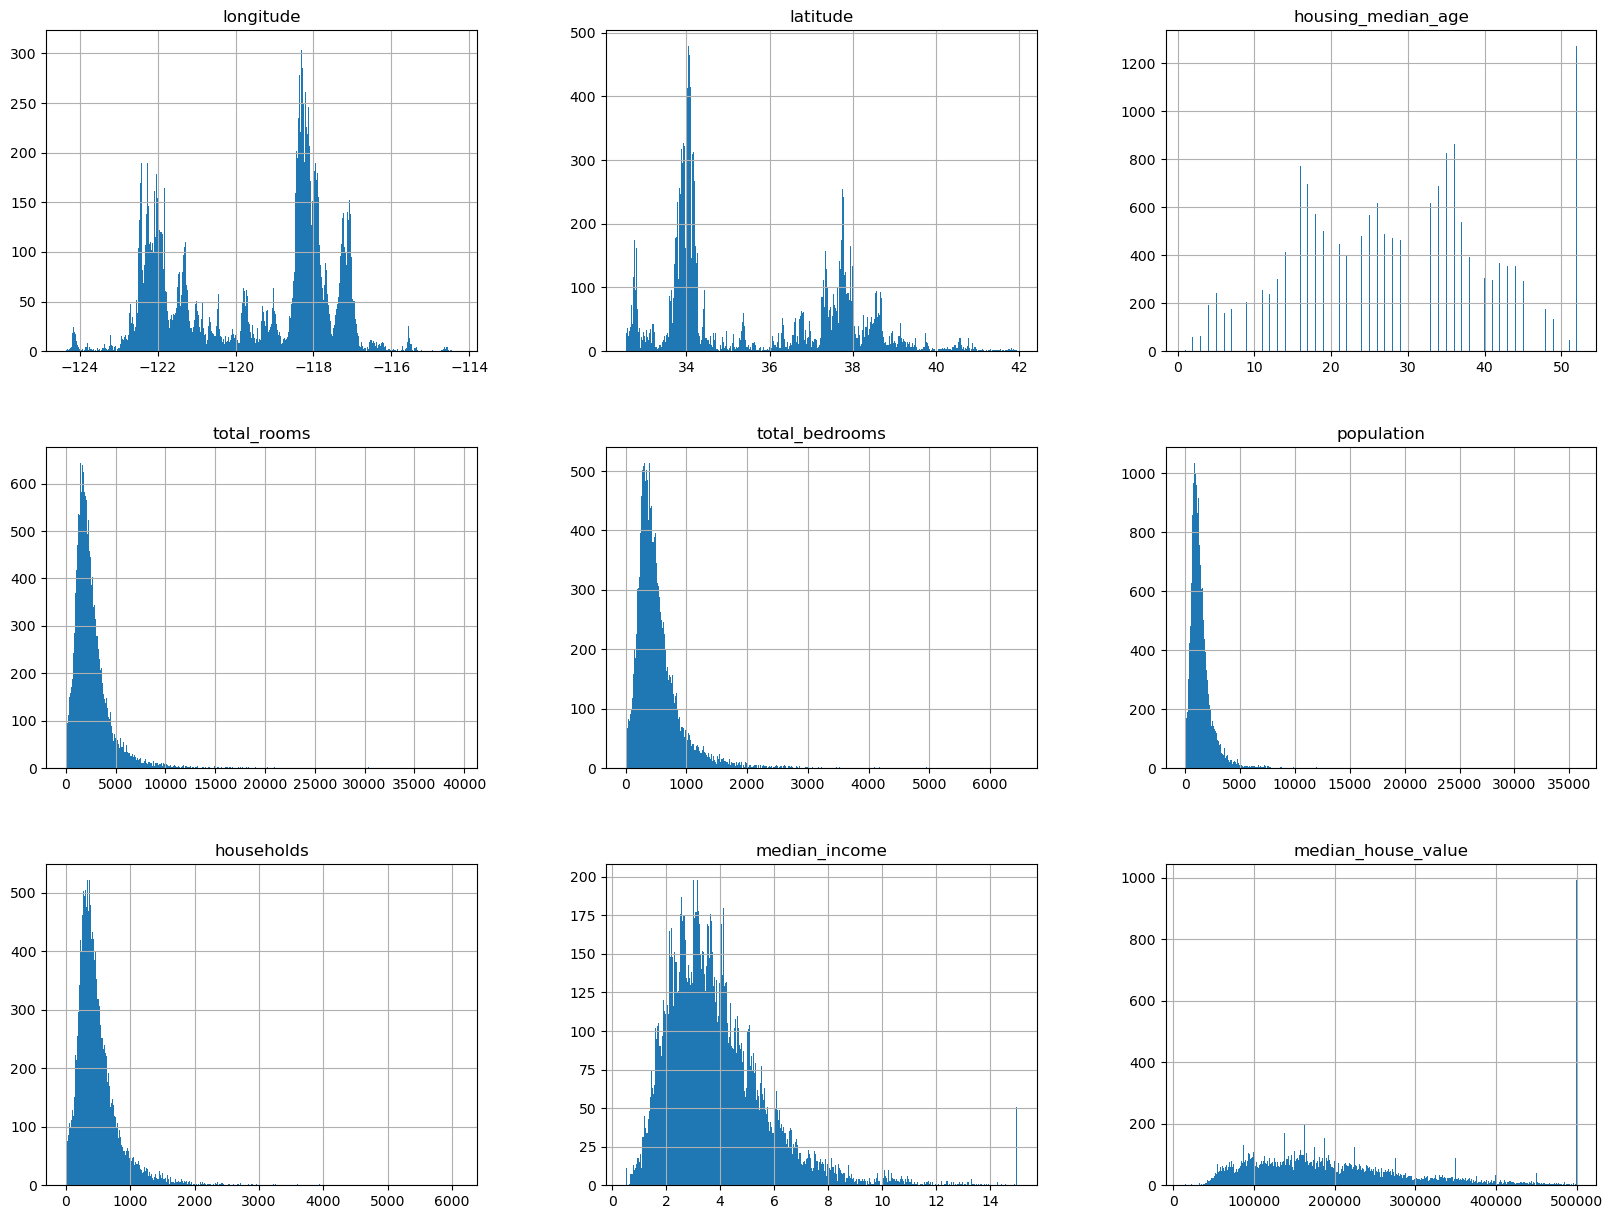

In [6]:
housing_data.hist(bins=500, figsize=(20,15))
plt.show()

In [8]:
# split data
def split_test_train(data, test_ratio:int):
    shuffled_indiced = np.random.permutation(len(housing_data))
    test_set_size = int(len(housing_data) * test_ratio)
    training_set_size = len(housing_data) * (1 - test_ratio)
    test_set = shuffled_indiced[:test_set_size]
    train_set = shuffled_indiced[test_set_size:]
    return data.iloc[train_set],data.iloc[test_set]
    
test_ratio = 1/10;
train_set, test_set = split_test_train(housing_data, test_ratio)
test_set.info()
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2064 entries, 12979 to 20454
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2064 non-null   float64
 1   latitude            2064 non-null   float64
 2   housing_median_age  2064 non-null   float64
 3   total_rooms         2064 non-null   float64
 4   total_bedrooms      2049 non-null   float64
 5   population          2064 non-null   float64
 6   households          2064 non-null   float64
 7   median_income       2064 non-null   float64
 8   median_house_value  2064 non-null   float64
 9   ocean_proximity     2064 non-null   object 
dtypes: float64(9), object(1)
memory usage: 177.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 18576 entries, 10626 to 9689
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18576 non-null  float

# EDA

# Visualising

/Users/shahid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


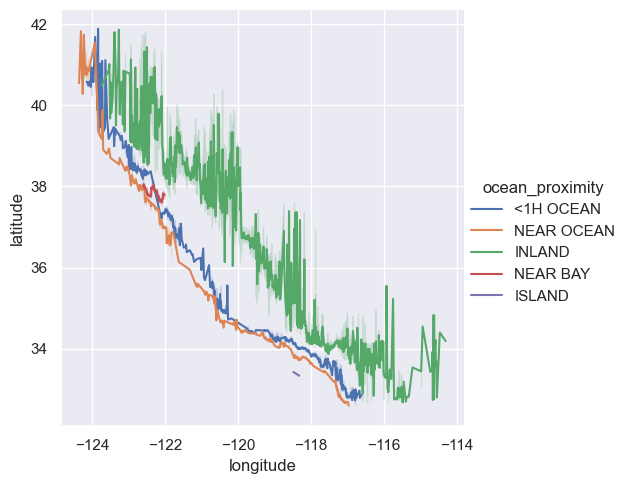

In [9]:
sns.set_theme()
sns.relplot(
    data=train_set, kind="line",
    x="longitude", y="latitude", hue="ocean_proximity"
)

/Users/shahid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


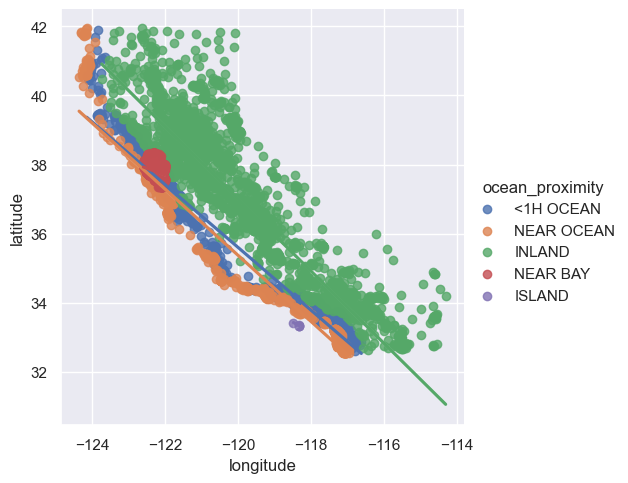

In [10]:
sns.lmplot(data=train_set, x="longitude", y="latitude", hue="ocean_proximity")

/Users/shahid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


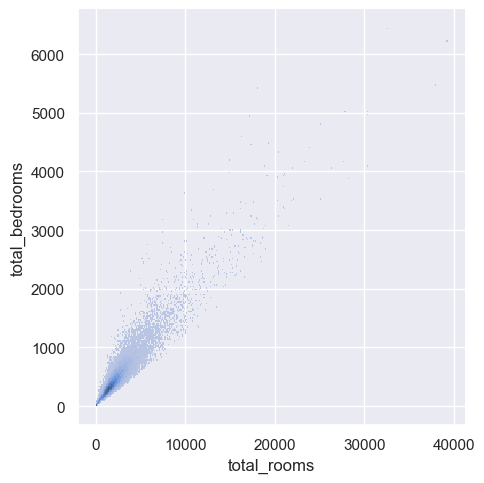

In [11]:
sns.displot(data=train_set, x="total_rooms", y="total_bedrooms")

In [12]:
# looking for correlations
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10626,-117.77,33.71,13.0,1939.0,247.0,928.0,244.0,8.1111,379800.0,<1H OCEAN
7168,-118.17,34.06,43.0,464.0,NaN,416.0,120.0,2.4750,142600.0,<1H OCEAN
15247,-117.26,32.99,16.0,2127.0,512.0,1532.0,499.0,2.7348,231300.0,NEAR OCEAN
13872,-117.34,34.39,8.0,3579.0,672.0,2216.0,630.0,3.4038,100500.0,INLAND
13421,-117.49,34.04,4.0,6034.0,1170.0,3527.0,1098.0,4.1775,143700.0,INLAND


In [13]:
train_set.loc[train_set["ocean_proximity"] == "INLAND", "ocean_proximity"] = 1
train_set.loc[train_set["ocean_proximity"] == "<1H OCEAN", "ocean_proximity"] = 2
train_set.loc[train_set["ocean_proximity"] == "NEAR BAY", "ocean_proximity"] = 3
train_set.loc[train_set["ocean_proximity"] == "NEAR OCEAN", "ocean_proximity"] = 4
train_set.loc[train_set["ocean_proximity"] == "ISLAND", "ocean_proximity"] = 5
train_set.head()
train_set.drop(columns=["INLAND","<1H OCEAN", "NEAR BAY"])



KeyError: "['INLAND', '<1H OCEAN', 'NEAR BAY'] not found in axis"

In [ ]:
corr_matrix = train_set.corr()
for col in train_set.columns:
    print(corr_matrix[col].sort_values(ascending=True))
    print("\n")
          

In [20]:
housing_data.dropna(subset=["total_bedrooms"])
housing_data.drop("total_bedrooms", axis=1)
median = train_set["total_bedrooms"].median
housing_data["total_bedrooms"].fillna(median, inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  object 
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.6+ MB


In [40]:
from sklearn.impute import SimpleImputer

housing_data.dropna(subset=["total_bedrooms"])
housing_data.drop("total_bedrooms", axis=1)

imputer = SimpleImputer(strategy="median")

housing_inputed = housing_data.drop("ocean_proximity", axis=1)
housing_inputed.drop("total_bedrooms", axis=1)

imputer.fit(housing_inputed)


TypeError: float() argument must be a string or a real number, not 'method'

In [41]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [49]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing_data[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
from sklearn.preprocessing import OneHotEncoder
hotencoder = OneHotEncoder()
housing_cat_data = hotencoder.fit_transform(housing_cat)
housing_cat_data.toarray()
hotencoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# Pipiline Transformation 
from sklearn.compose import ColumnTransformer
